16
20
14
19


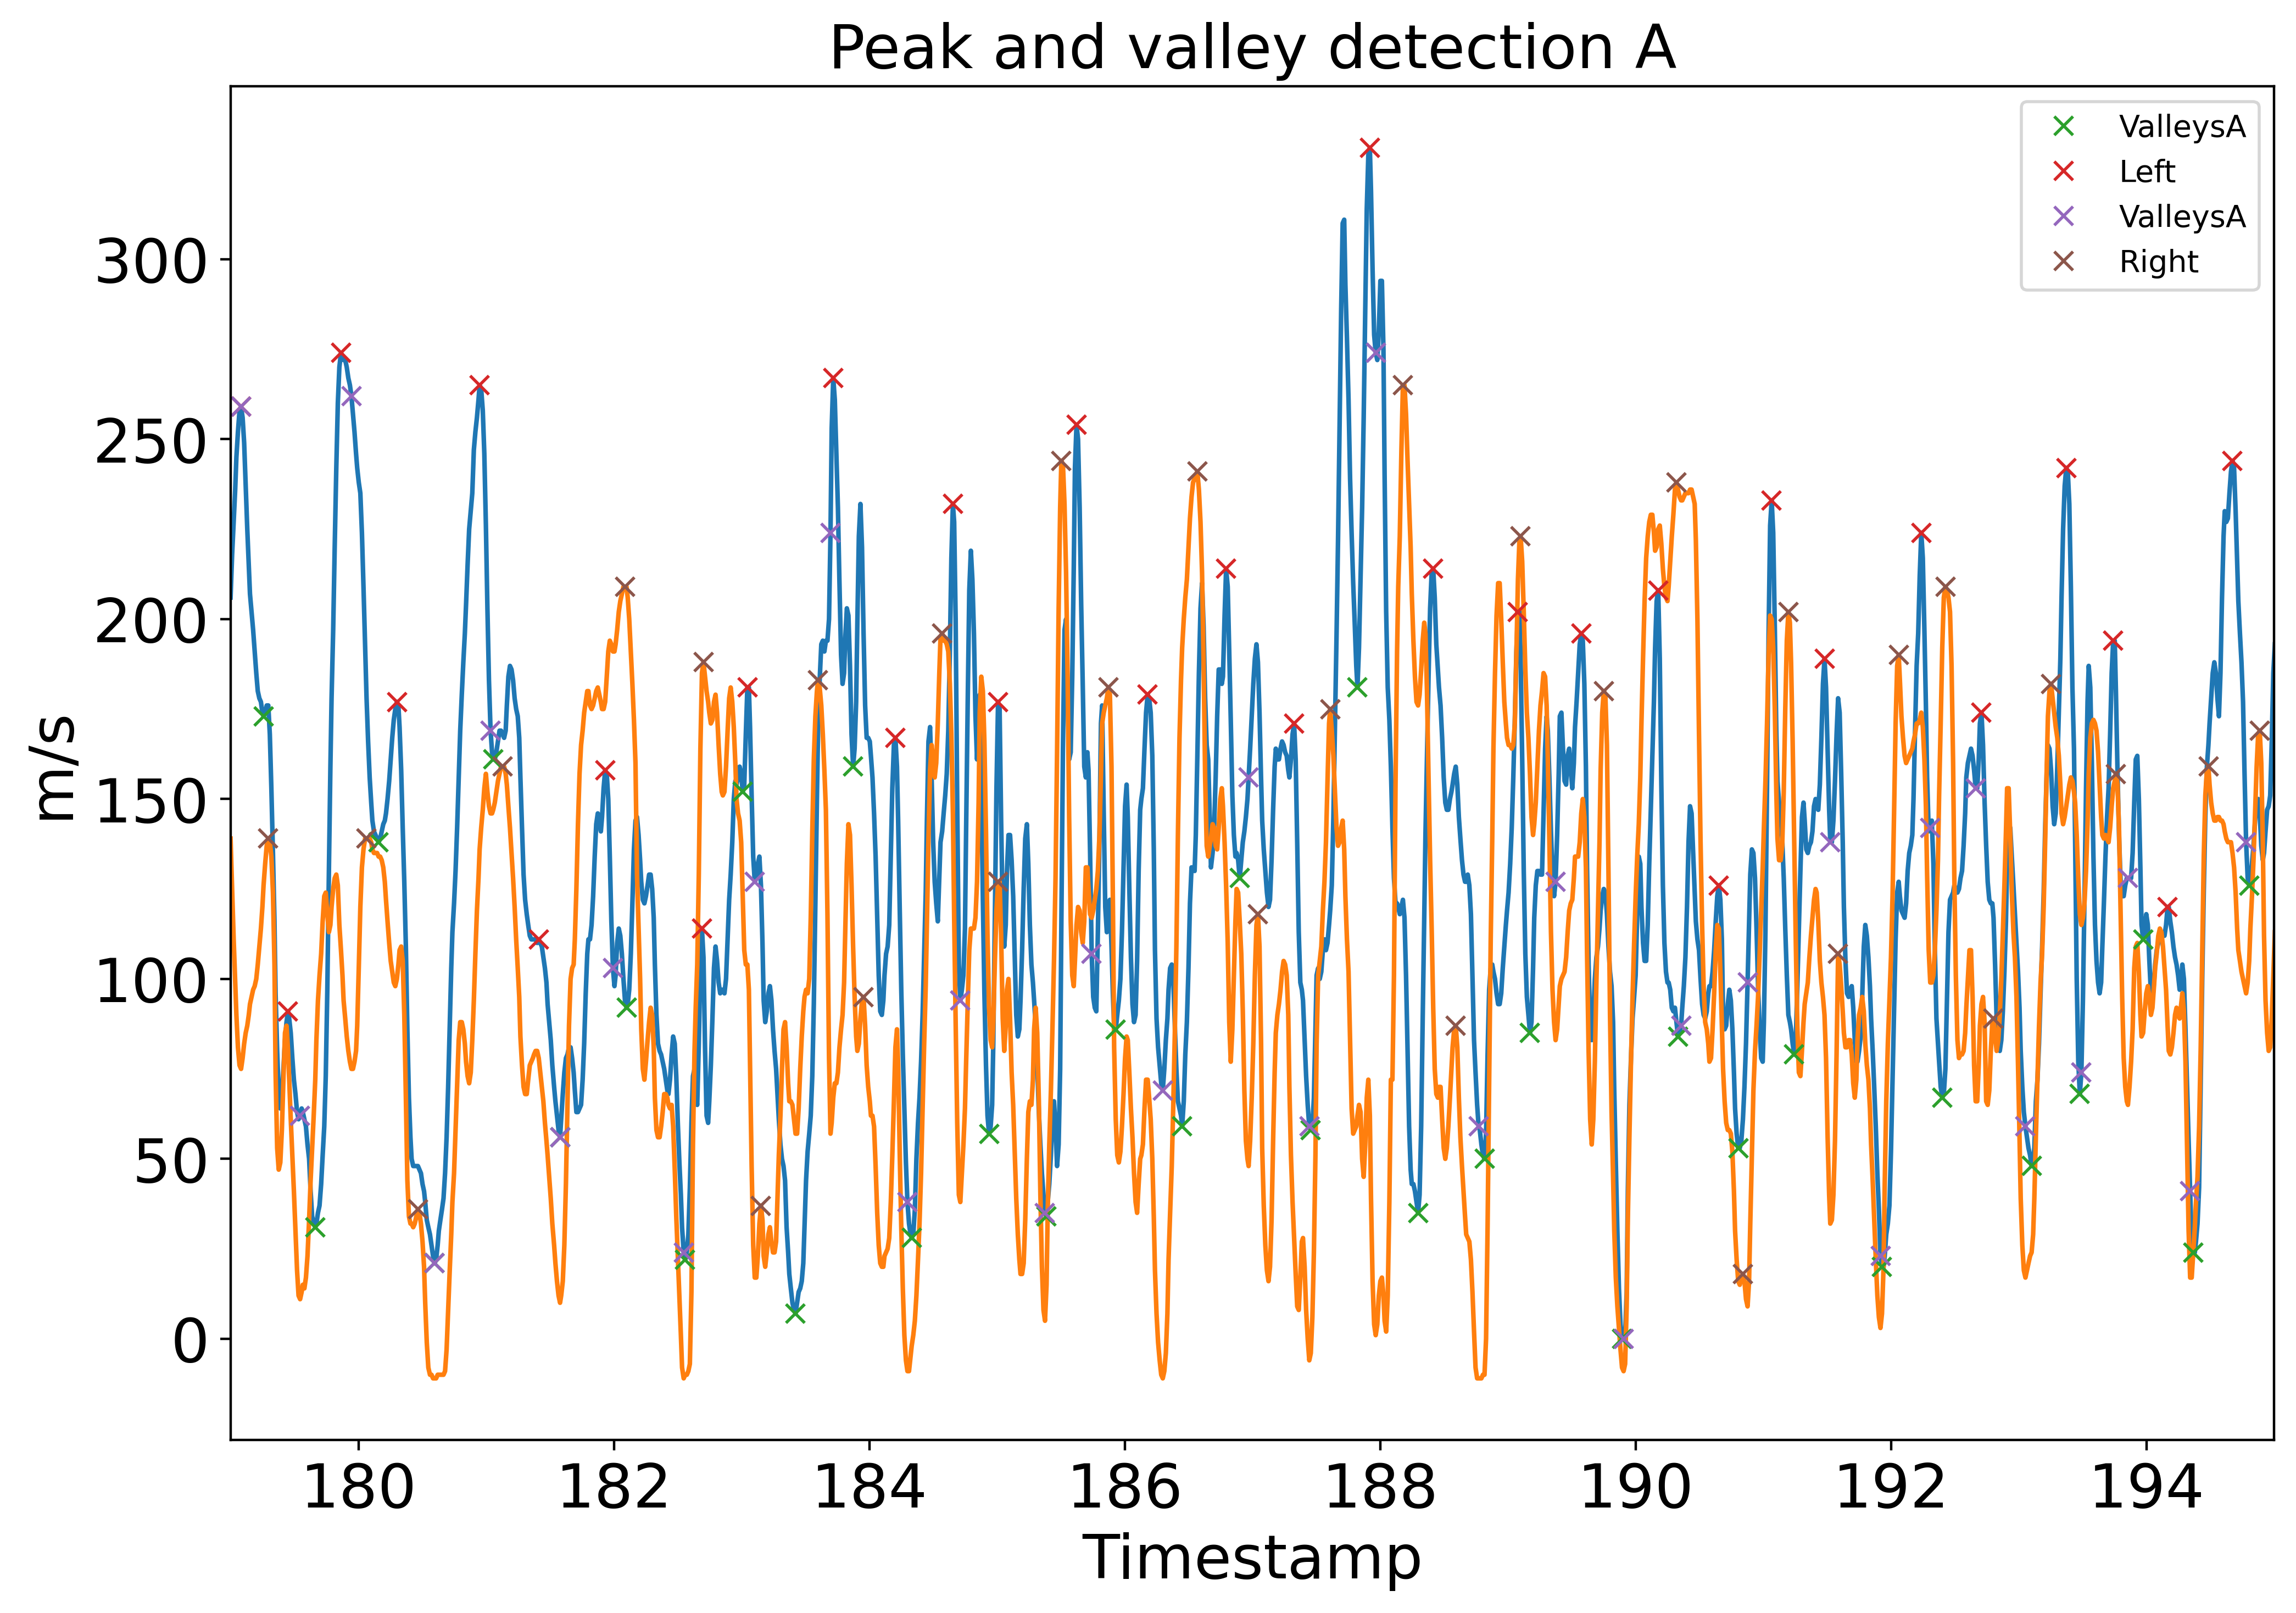

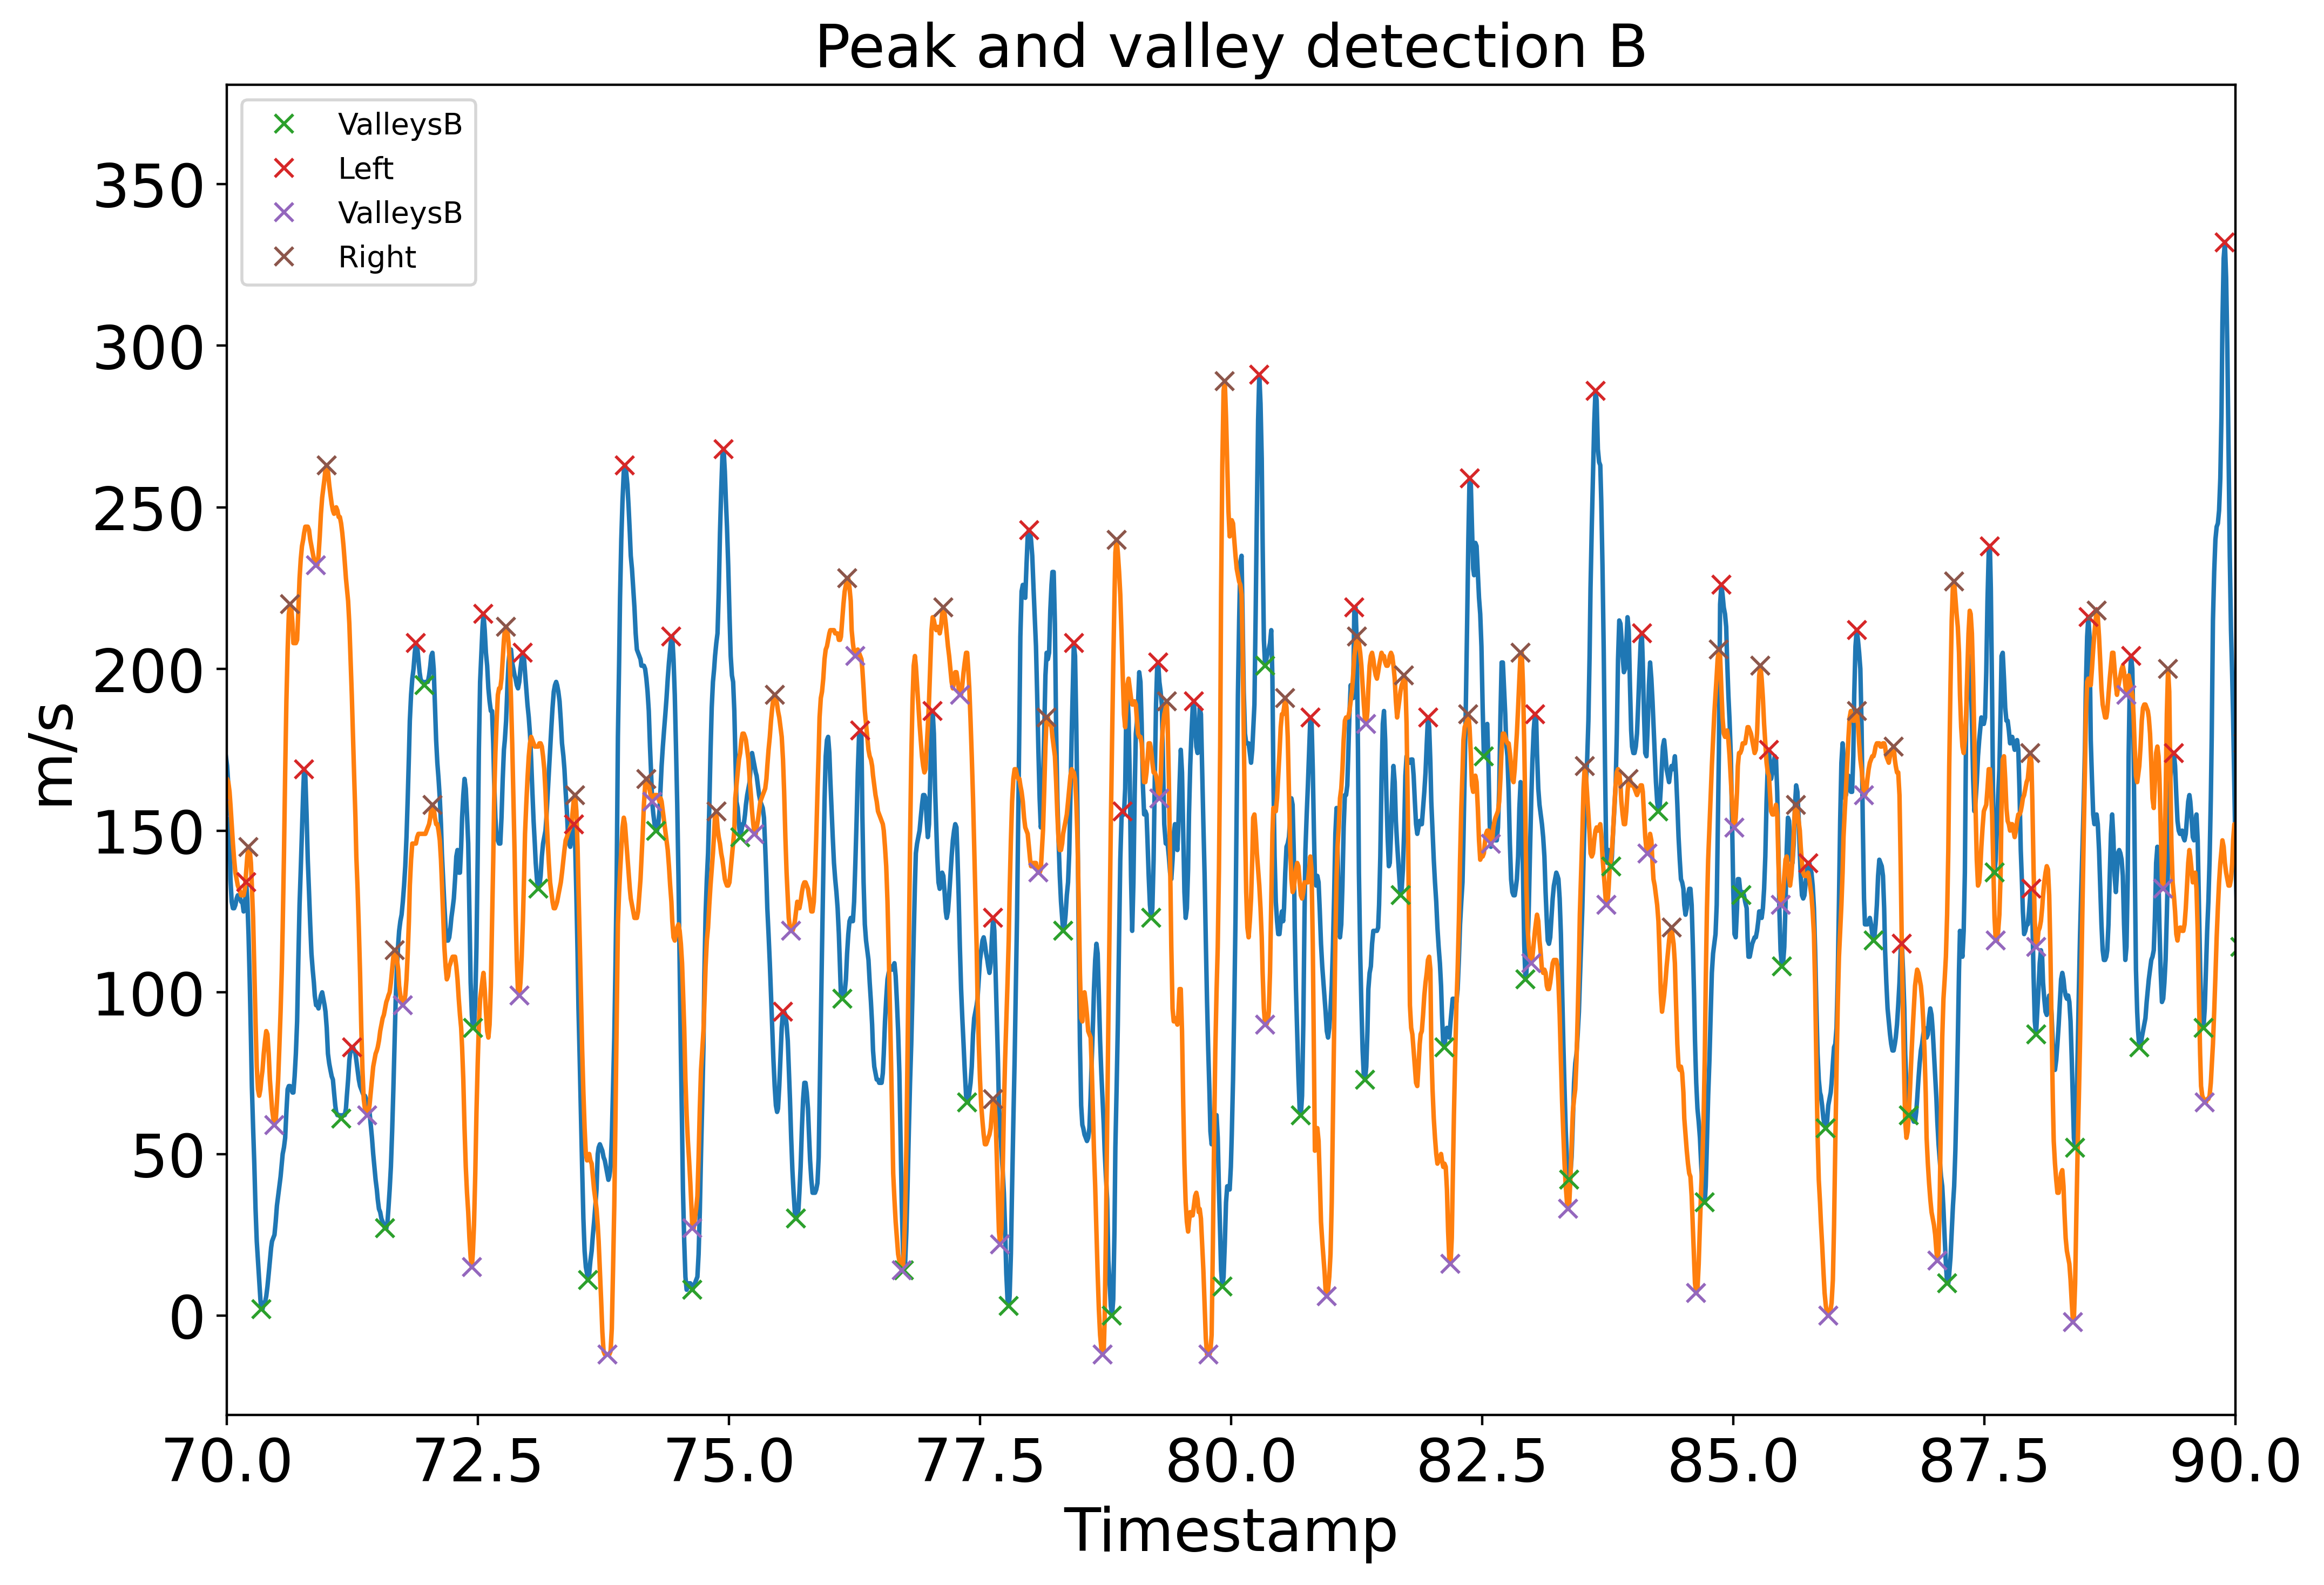

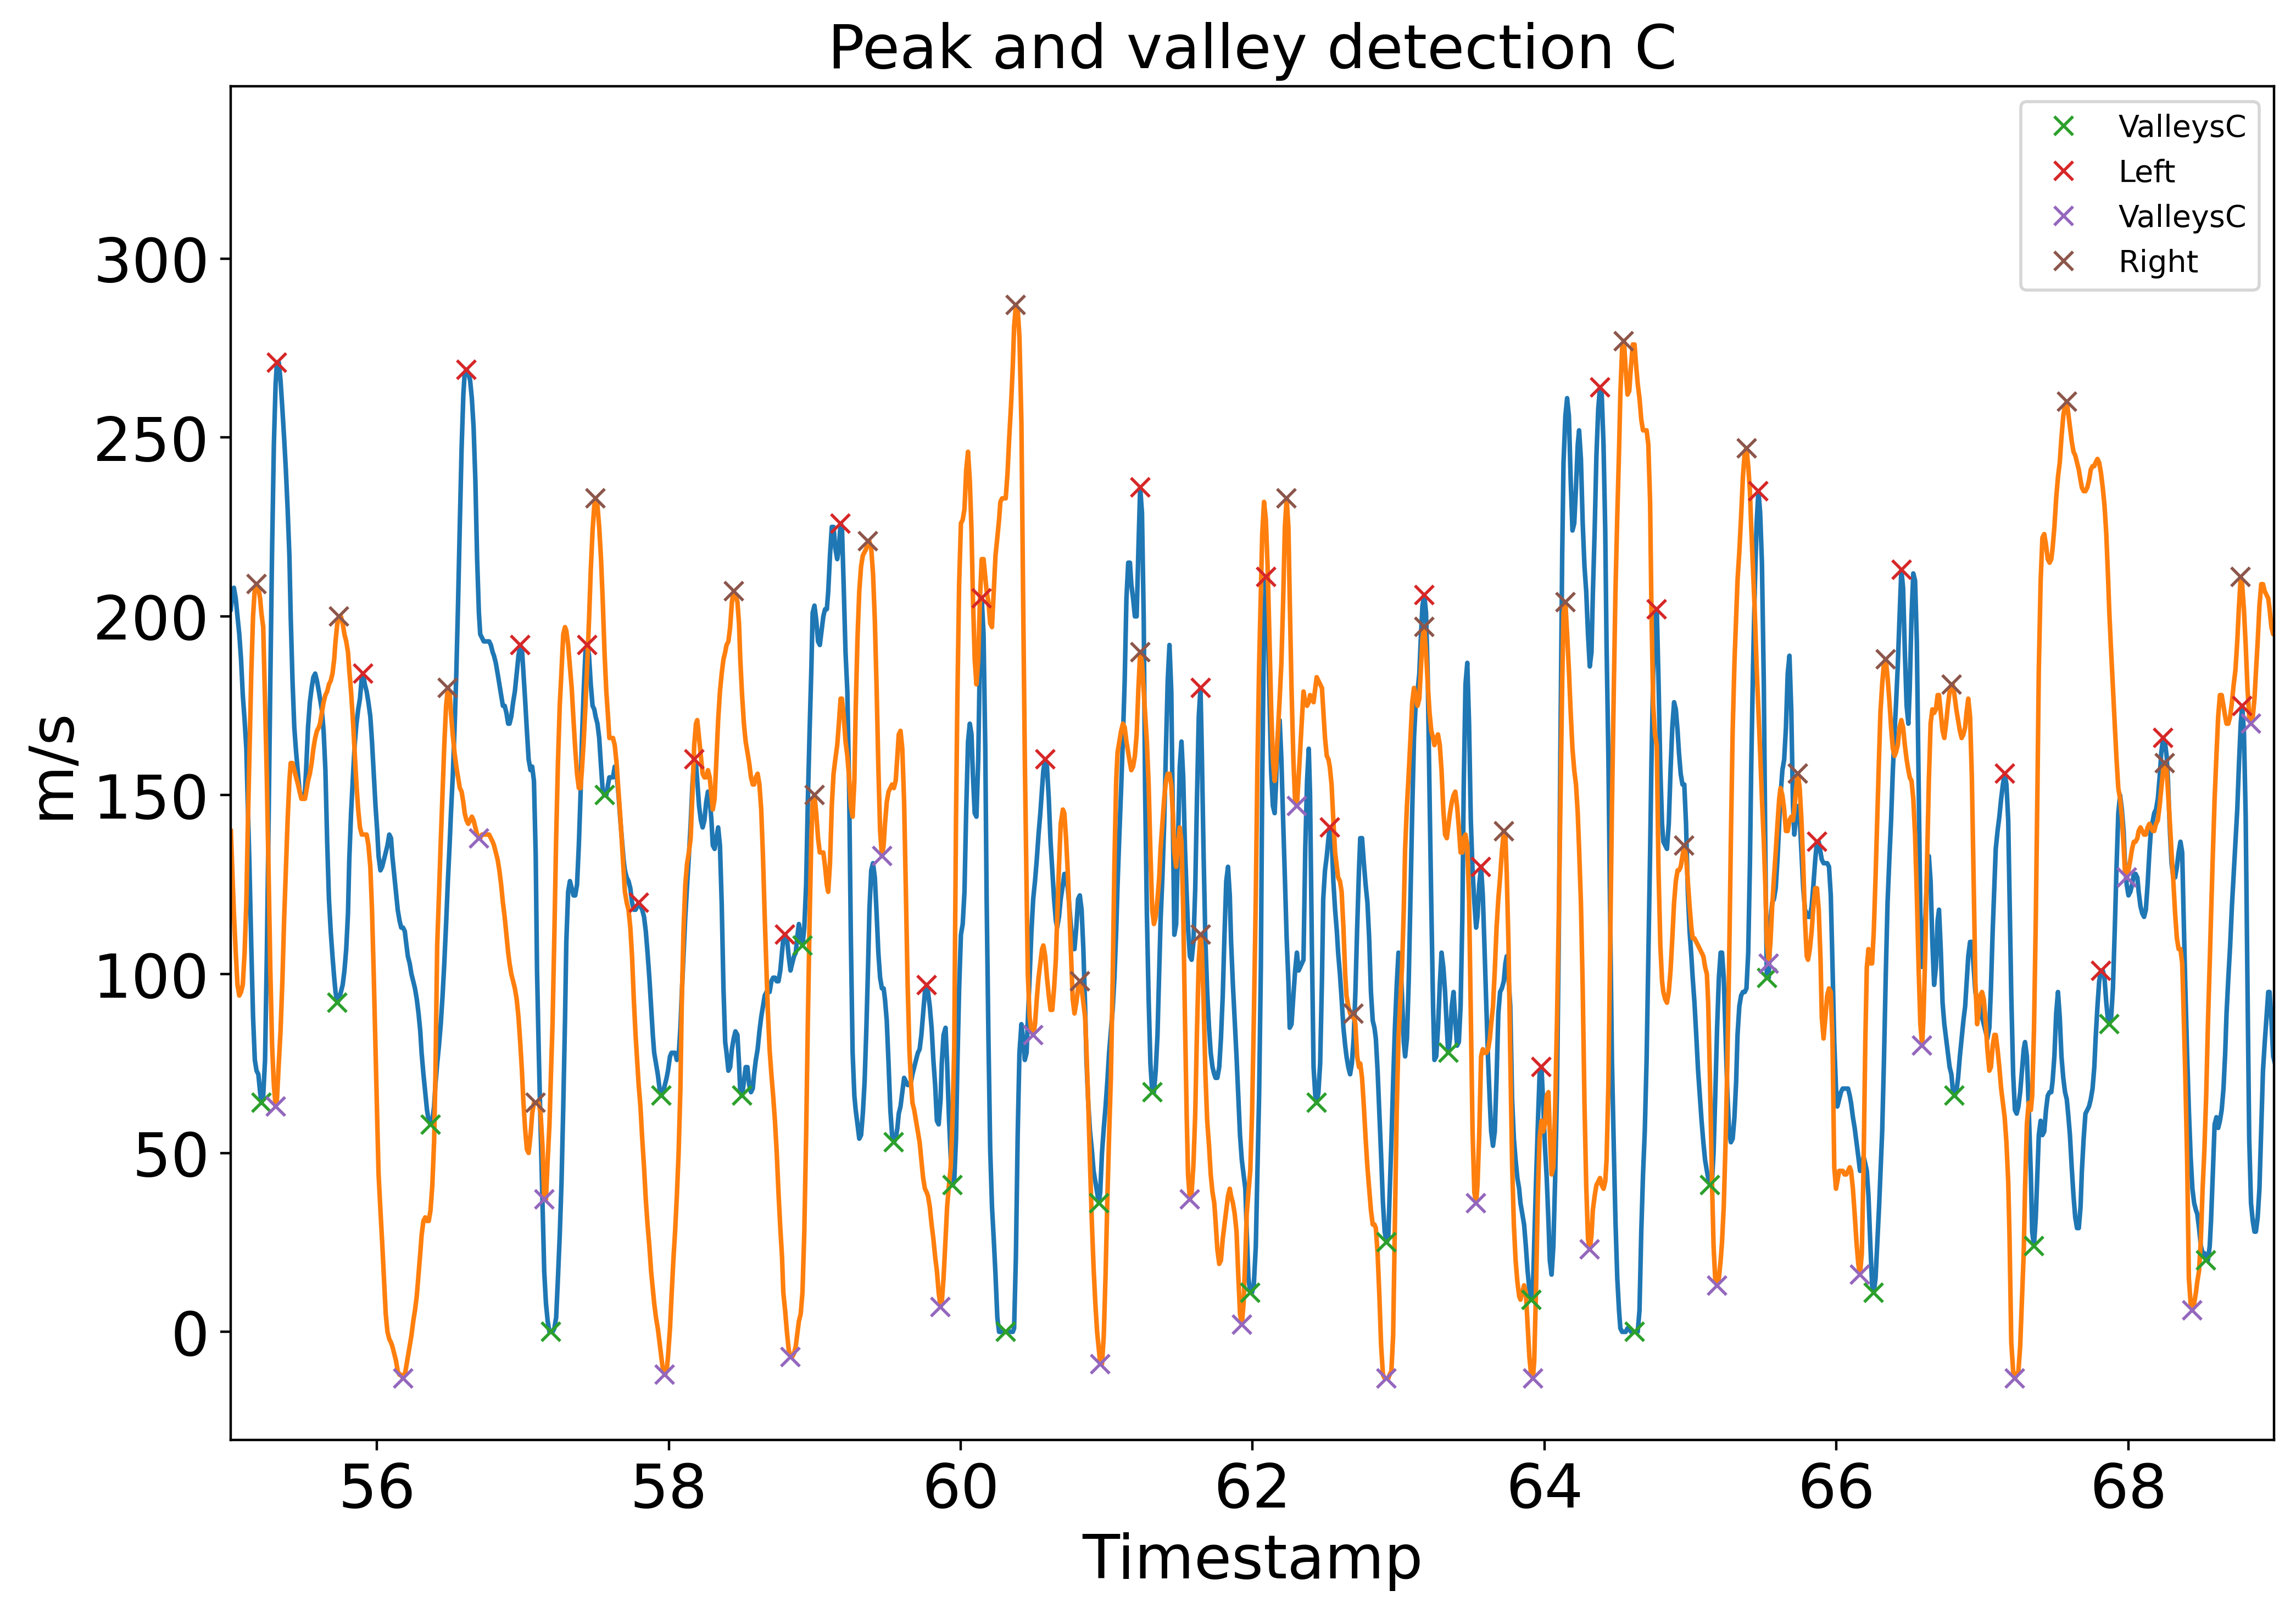

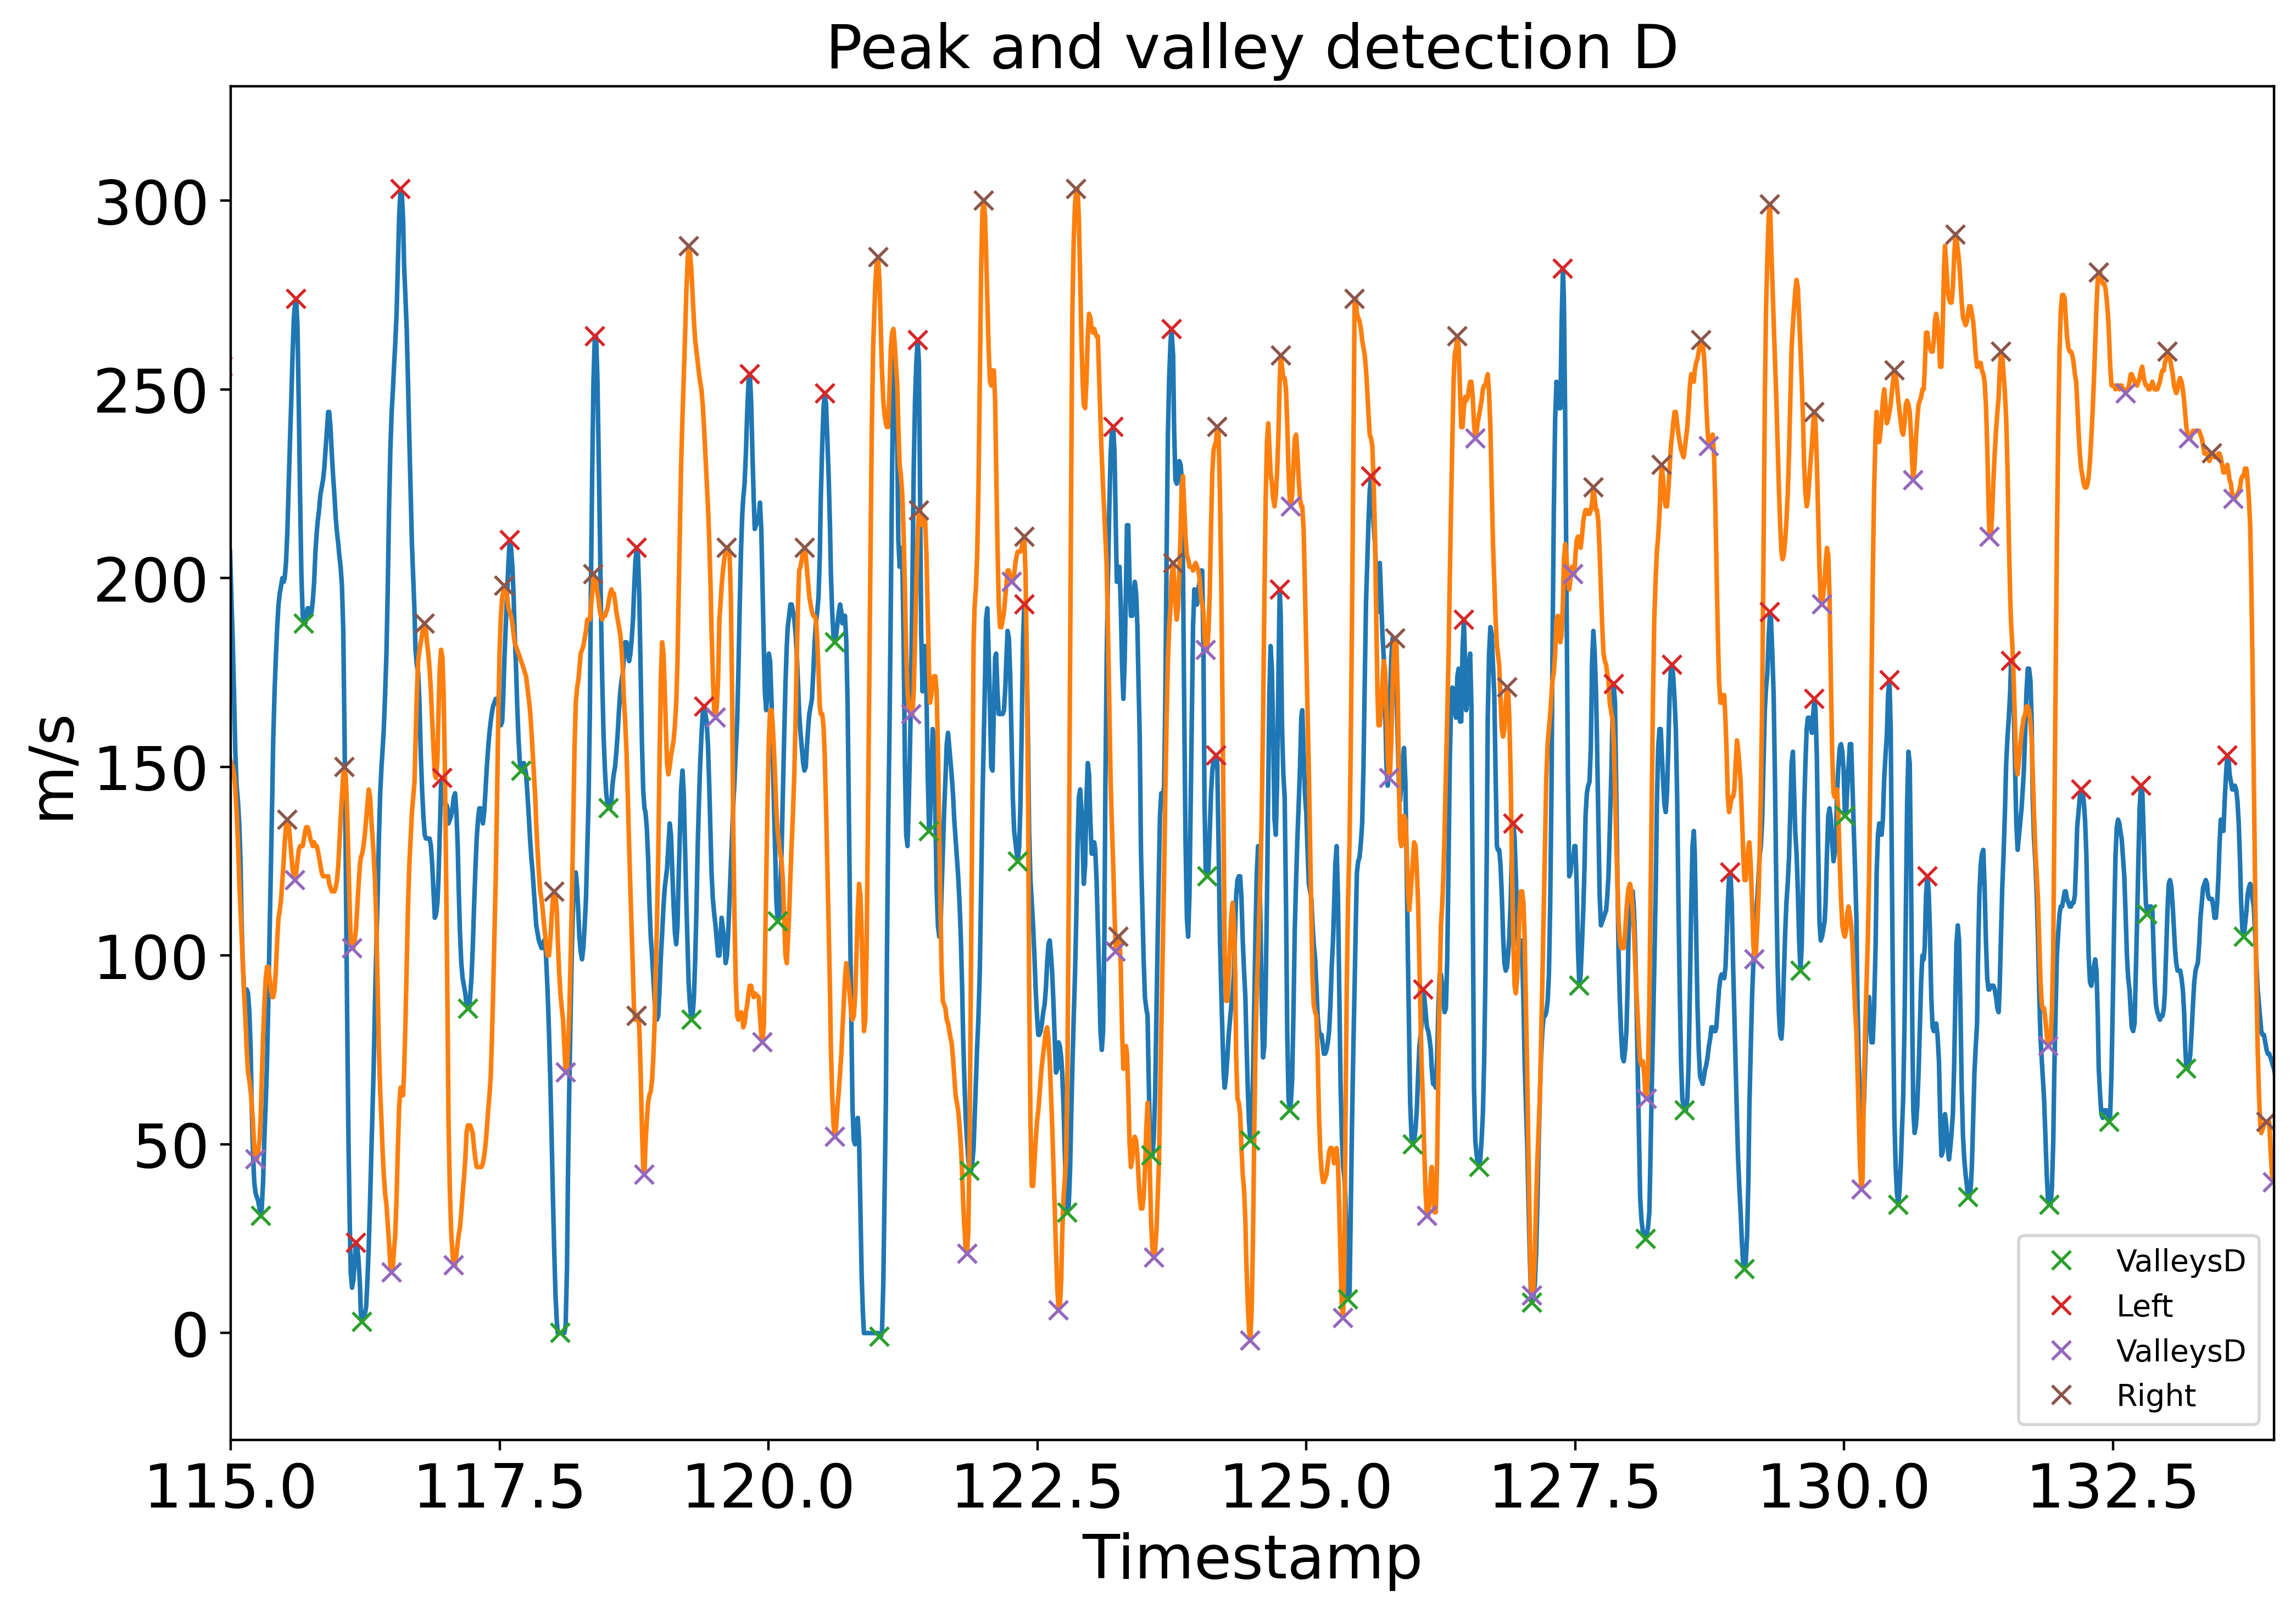

Number of cycles: 32
Number of cycles: 31
Number of cycles: 40
Number of cycles: 39
Number of cycles: 25
Number of cycles: 24
Number of cycles: 35
Number of cycles: 36
A1 - MaxAverage: 159.27051671732522, Standard Deviation: 47.761913455562585
A2 - MaxAverage: 124.30283911671924, Standard Deviation: 50.22048947309588
B1 - MaxAverage: 167.45673076923077, Standard Deviation: 60.75588015926948
B2 - MaxAverage: 147.66666666666666, Standard Deviation: 62.18484988769818
C1 - MaxAverage: 149.05769230769232, Standard Deviation: 49.90460648598194
C2 - MaxAverage: 149.7703180212014, Standard Deviation: 64.83275768316088
D1 - MaxAverage: 164.1004366812227, Standard Deviation: 54.743175282257624
D2 - MaxAverage: 175.1140350877193, Standard Deviation: 76.35739589770903
A1 - MinAverage: 110.88857142857142, Standard Deviation: 46.83334142881282
A2 - MinAverage: 120.80185758513932, Standard Deviation: 48.39188962077738
B1 - MinAverage: 97.70270270270271, Standard Deviation: 57.14886434040576
B2 - MinA

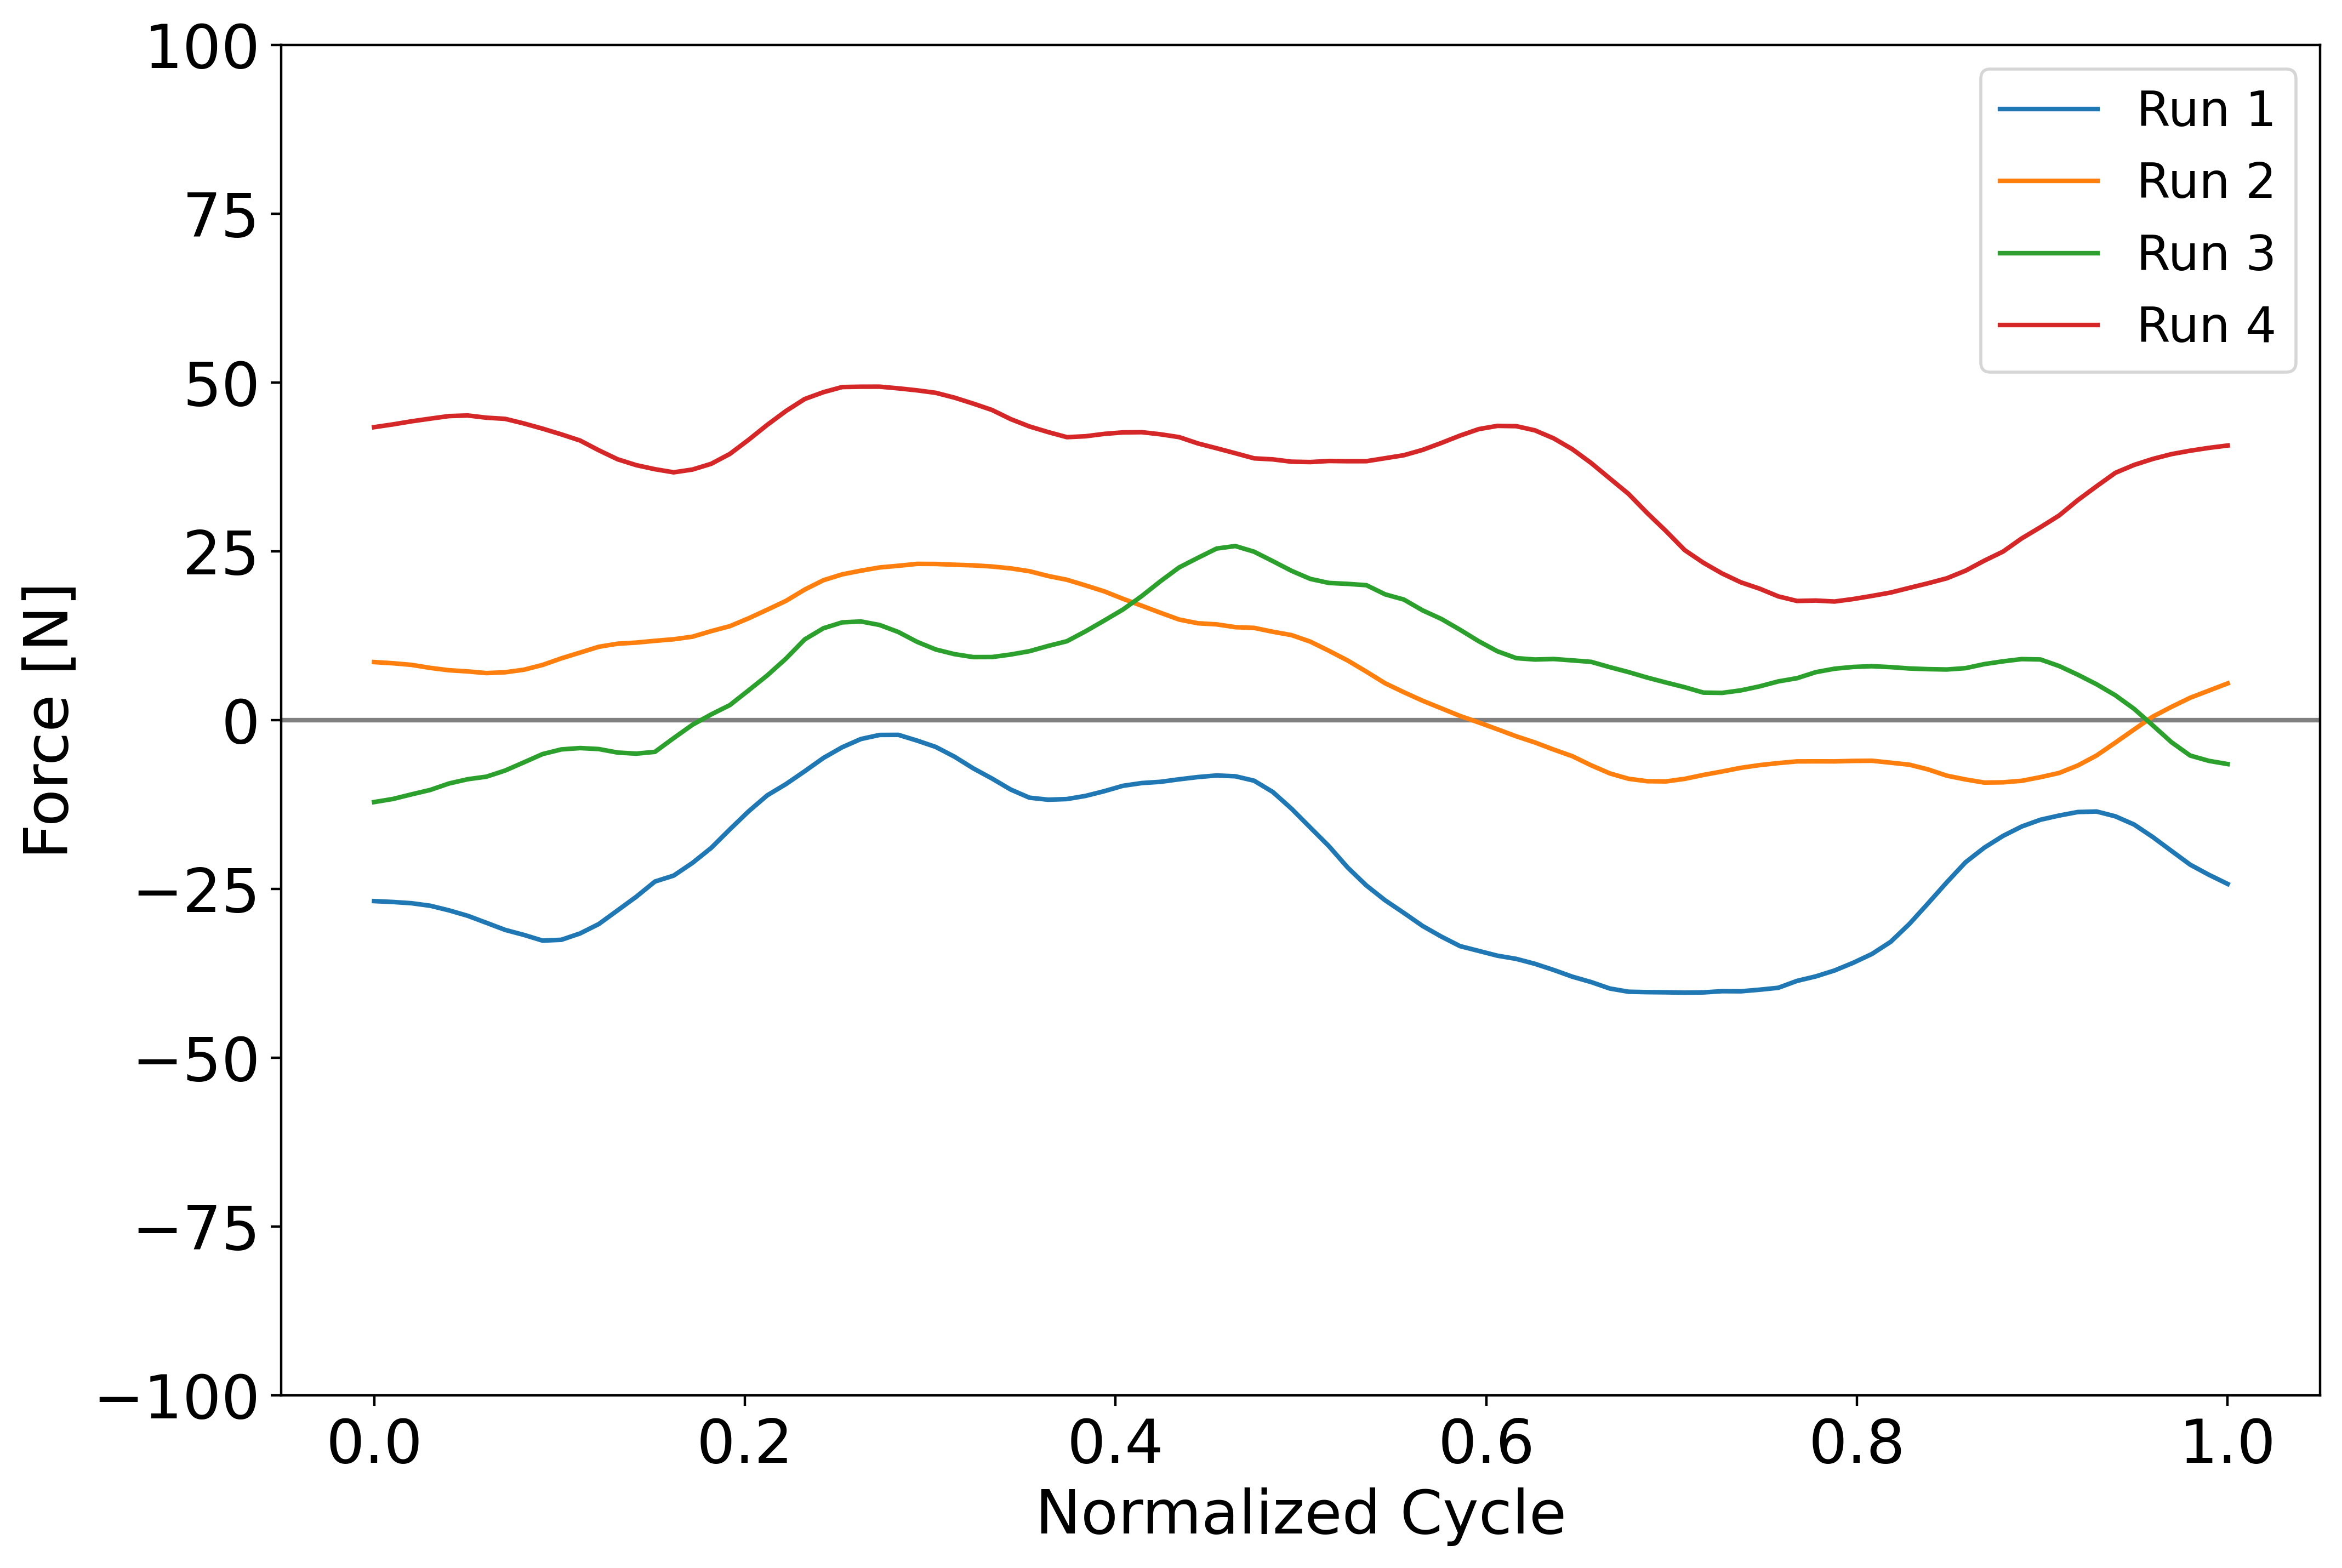

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks
from scipy.interpolate import interp1d
from matplotlib.colors import Normalize
from matplotlib.cm import get_cmap
from datetime import datetime
from scipy.stats import t

data1 = pd.read_csv('Petter-H1.csv')
data2 = pd.read_csv('Petter-H2.csv')
data3 = pd.read_csv('Petter-H3-2.csv')
data4 = pd.read_csv('Petter-H4.csv')


### TIMESTAMPS ###
start1 = 179
end1 = 195

start2 = 70
end2 = 90

start3 = 55
end3 = 69

start4 = 115
end4 = 134


### LEGEND ###
LABELX = "Normalized Cycle"
LABELY = "Force [N]"
TITLE = "Delta Knee - Position C - Uphill"

timestampsA = data1.iloc[:, 0].tolist()
valuesA1 = data1.iloc[:, 2].tolist()
valuesA2 = data1.iloc[:, 1].tolist()

timestampsB = data2.iloc[:, 0].tolist()
valuesB1 = data2.iloc[:, 2].tolist()
valuesB2 = data2.iloc[:, 1].tolist()

timestampsC = data3.iloc[:, 0].tolist()
valuesC1 = data3.iloc[:, 2].tolist()
valuesC2 = data3.iloc[:, 1].tolist()

timestampsD = data4.iloc[:, 0].tolist()
valuesD1 = data4.iloc[:, 2].tolist()
valuesD2 = data4.iloc[:, 1].tolist()

first1 = datetime.strptime(timestampsA[0], '%Y-%m-%d %H:%M:%S.%f')
first2 = datetime.strptime(timestampsB[0], '%Y-%m-%d %H:%M:%S.%f')
first3 = datetime.strptime(timestampsC[0], '%Y-%m-%d %H:%M:%S.%f')
first4 = datetime.strptime(timestampsD[0], '%Y-%m-%d %H:%M:%S.%f')


first1_milli = first1.timestamp()
first2_milli = first2.timestamp()
first3_milli = first3.timestamp()
first4_milli = first4.timestamp()

timestamps1_sec = [(datetime.strptime(i, '%Y-%m-%d %H:%M:%S.%f').timestamp() - first1_milli) for i in timestampsA]
timestamps2_sec = [(datetime.strptime(i, '%Y-%m-%d %H:%M:%S.%f').timestamp() - first2_milli) for i in timestampsB]
timestamps3_sec = [(datetime.strptime(i, '%Y-%m-%d %H:%M:%S.%f').timestamp() - first3_milli) for i in timestampsC]
timestamps4_sec = [(datetime.strptime(i, '%Y-%m-%d %H:%M:%S.%f').timestamp() - first4_milli) for i in timestampsD]

timestamps1_sec = np.array(timestamps1_sec)
valuesA1 = np.array(valuesA1)
valuesA2 = np.array(valuesA2)

timestamps2_sec = np.array(timestamps2_sec)
valuesB1 = np.array(valuesB1)
valuesB2 = np.array(valuesB2)

timestamps3_sec = np.array(timestamps3_sec)
valuesC1 = np.array(valuesC1)
valuesC2 = np.array(valuesC2)

timestamps4_sec = np.array(timestamps4_sec)
valuesD1 = np.array(valuesD1)
valuesD2 = np.array(valuesD2)


########--------------Data selection -----------------------------------------------------------------------#####
## Astart bakke=
## Bstart bakke=
## Cstart bakke=
## Dstart bakke=

########--------------Valley detection1 AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA -----------------------------------------------------------------------#####

t_tot = (end1 - start1)
mask = (timestamps1_sec >= start1) & (timestamps1_sec <= end1)
print(t_tot)

inverted_valuesA1 = -valuesA1
valuesA1 = valuesA1
inverted_valuesA2 = -valuesA2
valuesA2 = valuesA2

prominence_threshold = 1
distance_threshold = 30

valley_indicesA1, _ = find_peaks(inverted_valuesA1, prominence=prominence_threshold, distance=distance_threshold)
indicesA1, _ = find_peaks(valuesA1, prominence=prominence_threshold, distance=distance_threshold)

valley_indicesA2, _ = find_peaks(inverted_valuesA2, prominence=prominence_threshold, distance=distance_threshold)
indicesA2, _ = find_peaks(valuesA2, prominence=prominence_threshold, distance=distance_threshold)

valleyAXA1 = timestamps1_sec[valley_indicesA1]
valleyAYA1 = valuesA1[valley_indicesA1]
AXA1 = timestamps1_sec[indicesA1]
AYA1 = valuesA1[indicesA1]

valleyAXA2 = timestamps1_sec[valley_indicesA2]
valleyAYA2 = valuesA1[valley_indicesA2]
AXA2 = timestamps1_sec[indicesA2]
AYA2 = valuesA2[indicesA2]

mask = (timestamps1_sec >= start1) & (timestamps1_sec <= end1)
filtered_t1 = timestamps1_sec[mask]
filtered_A1 = valuesA1[mask]
filtered_A2 = valuesA2[mask]

valley_indicesA1, _ = find_peaks(-filtered_A1, prominence=prominence_threshold, distance=distance_threshold)
indicesA1, _ = find_peaks(-filtered_A1, prominence=prominence_threshold, distance=distance_threshold)

valley_indicesA2, _ = find_peaks(-filtered_A2, prominence=prominence_threshold, distance=distance_threshold)
indicesA2, _ = find_peaks(-filtered_A2, prominence=prominence_threshold, distance=distance_threshold)

########---------BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB-----Valley detection2 -----------------------------------------------------------------------#####


t_tot = (end2 - start2)
mask = (timestamps1_sec >= start2) & (timestamps1_sec <= end2)
print(t_tot)

inverted_valuesB1 = -valuesB1
valuesB1 = valuesB1
inverted_valuesB2 = -valuesB2
valuesB2 = valuesB2

prominence_thresholdB = 1
distance_thresholdB = 30

valley_indicesB1, _ = find_peaks(inverted_valuesB1, prominence=prominence_thresholdB, distance=distance_thresholdB)
indicesB1, _ = find_peaks(valuesB1, prominence=prominence_thresholdB, distance=distance_thresholdB)
valley_indicesB2, _ = find_peaks(inverted_valuesB2, prominence=prominence_thresholdB, distance=distance_thresholdB)
indicesB2, _ = find_peaks(valuesB2, prominence=prominence_thresholdB, distance=distance_thresholdB)

valleyBXB1 = timestamps2_sec[valley_indicesB1]
valleyBYB1 = valuesB1[valley_indicesB1]
BXB1 = timestamps2_sec[indicesB1]
BYB1 = valuesB1[indicesB1]

valleyBXB2 = timestamps2_sec[valley_indicesB2]
valleyBYB2 = valuesB2[valley_indicesB2]
BXB2 = timestamps2_sec[indicesB2]
BYB2 = valuesB2[indicesB2]


mask = (timestamps2_sec >= start2) & (timestamps2_sec <= end2)
filtered_t2 = timestamps2_sec[mask]
filtered_B1 = valuesB1[mask]
filtered_B2 = valuesB2[mask]

valley_indicesB1, _ = find_peaks(-filtered_B1, prominence=prominence_thresholdB, distance=distance_thresholdB)
indicesB1, _ = find_peaks(-filtered_B1, prominence=prominence_thresholdB, distance=distance_thresholdB)
valley_indicesB2, _ = find_peaks(-filtered_B2, prominence=prominence_thresholdB, distance=distance_thresholdB)
indicesB2, _ = find_peaks(-filtered_B2, prominence=prominence_thresholdB, distance=distance_thresholdB)

########----------CCCCCCCCCCCCCCCCCCCCCCCCCCCCCC----Valley detection3 -----------------------------------------------------------------------#####

t_tot = (end3 - start3)
mask = (timestamps1_sec >= start3) & (timestamps1_sec <= end3)
print(t_tot)

inverted_valuesC1 = -valuesC1
valuesC1 = valuesC1
inverted_valuesC2 = -valuesC2
valuesC2 = valuesC2

prominence_thresholdC = 1
distance_thresholdC = 30


valley_indicesC1, _ = find_peaks(inverted_valuesC1, prominence=prominence_thresholdC, distance=distance_thresholdC)
indicesC1, _ = find_peaks(valuesC1, prominence=prominence_thresholdC, distance=distance_thresholdC)
valley_indicesC2, _ = find_peaks(inverted_valuesC2, prominence=prominence_thresholdC, distance=distance_thresholdC)
indicesC2, _ = find_peaks(valuesC2, prominence=prominence_thresholdC, distance=distance_thresholdC)

valleyCXC1 = timestamps3_sec[valley_indicesC1]
valleyCYC1 = valuesC1[valley_indicesC1]
CXC1 = timestamps3_sec[indicesC1]
CYC1 = valuesC1[indicesC1]

valleyCXC2 = timestamps3_sec[valley_indicesC2]
valleyCYC2 = valuesC2[valley_indicesC2]
CXC2 = timestamps3_sec[indicesC2]
CYC2 = valuesC2[indicesC2]

mask = (timestamps3_sec >= start3) & (timestamps3_sec <= end3)
filtered_t3 = timestamps3_sec[mask]
filtered_C1 = valuesC1[mask]
filtered_C2 = valuesC2[mask]


valley_indicesC1, _ = find_peaks(-filtered_C1, prominence=prominence_thresholdC, distance=distance_thresholdC)
indicesC1, _ = find_peaks(-filtered_C1, prominence=prominence_thresholdC, distance=distance_thresholdC)

valley_indicesC2, _ = find_peaks(-filtered_C2, prominence=prominence_thresholdC, distance=distance_thresholdC)
indicesC2, _ = find_peaks(-filtered_C2, prominence=prominence_thresholdC, distance=distance_thresholdC)

########------DDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDD--------Valley detection4 -----------------------------------------------------------------------#####
t_tot = (end4 - start4)
mask = (timestamps1_sec >= start4) & (timestamps1_sec <= end4)
print(t_tot)

inverted_valuesD1 = -valuesD1
valuesD1 = valuesD1
inverted_valuesD2 = -valuesD2
valuesD2 = valuesD2

prominence_thresholdD = 1
distance_thresholdD = 30


valley_indicesD1, _ = find_peaks(inverted_valuesD1, prominence=prominence_thresholdD, distance=distance_thresholdD)
indicesD1, _ = find_peaks(valuesD1, prominence=prominence_thresholdD, distance=distance_thresholdD)
valley_indicesD2, _ = find_peaks(inverted_valuesD2, prominence=prominence_thresholdD, distance=distance_thresholdD)
indicesD2, _ = find_peaks(valuesD2, prominence=prominence_thresholdD, distance=distance_thresholdD)

valleyDXD1 = timestamps4_sec[valley_indicesD1]
valleyDYD1 = valuesD1[valley_indicesD1]
DXD1 = timestamps4_sec[indicesD1]
DYD1 = valuesD1[indicesD1]

valleyDXD2 = timestamps4_sec[valley_indicesD2]
valleyDYD2 = valuesD2[valley_indicesD2]
DXD2 = timestamps4_sec[indicesD2]
DYD2 = valuesD2[indicesD2]

mask = (timestamps4_sec >= start4) & (timestamps4_sec <= end4)
filtered_t4 = timestamps4_sec[mask]
filtered_D1 = valuesD1[mask]
filtered_D2 = valuesD2[mask]


valley_indicesD1, _ = find_peaks(-filtered_D1, prominence=prominence_thresholdD, distance=distance_thresholdD)
indicesD1, _ = find_peaks(-filtered_D1, prominence=prominence_thresholdD, distance=distance_thresholdD)

valley_indicesD2, _ = find_peaks(-filtered_D2, prominence=prominence_thresholdD, distance=distance_thresholdD)
indicesD2, _ = find_peaks(-filtered_D2, prominence=prominence_thresholdD, distance=distance_thresholdD)



########             PLOT 2 Valley detection Speed              ####################

plt.figure(figsize=(12, 8), dpi=400)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("Peak and valley detection A", fontsize=20)
plt.xlabel("Timestamp", fontsize=20)
plt.ylabel("m/s", fontsize=20)
plt.xlim([start1, end1])
plt.plot(timestamps1_sec, valuesA1)
plt.plot(timestamps1_sec, valuesA2)
plt.plot(valleyAXA1, valleyAYA1, "x", label="ValleysA")
plt.plot(AXA1, AYA1, "x", label="Left")
plt.plot(valleyAXA2, valleyAYA2, "x", label="ValleysA")
plt.plot(AXA2, AYA2, "x", label="Right")
plt.legend()
plt.show()

plt.figure(figsize=(12, 8), dpi=400)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("Peak and valley detection B", fontsize=20)
plt.xlabel("Timestamp", fontsize=20)
plt.ylabel("m/s", fontsize=20)
plt.xlim([start2, end2])
plt.plot(timestamps2_sec, valuesB1)
plt.plot(timestamps2_sec, valuesB2)
plt.plot(valleyBXB1, valleyBYB1, "x", label="ValleysB")
plt.plot(BXB1, BYB1, "x", label="Left")
plt.plot(valleyBXB2, valleyBYB2, "x", label="ValleysB")
plt.plot(BXB2, BYB2, "x", label="Right")
plt.legend()
plt.show()


plt.figure(figsize=(12, 8), dpi=400)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("Peak and valley detection C", fontsize=20)
plt.xlabel("Timestamp", fontsize=20)
plt.ylabel("m/s", fontsize=20)
plt.xlim([start3, end3])
plt.plot(timestamps3_sec, valuesC1)
plt.plot(timestamps3_sec, valuesC2)
plt.plot(valleyCXC1, valleyCYC1, "x", label="ValleysC")
plt.plot(CXC1, CYC1, "x", label="Left")
plt.plot(valleyCXC2, valleyCYC2, "x", label="ValleysC")
plt.plot(CXC2, CYC2, "x", label="Right")
plt.legend()
plt.show()

plt.figure(figsize=(12, 8), dpi=400)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("Peak and valley detection D", fontsize=20)
plt.xlabel("Timestamp", fontsize=20)
plt.ylabel("m/s", fontsize=20)
plt.xlim([start4, end4])
plt.plot(timestamps4_sec, valuesD1)
plt.plot(timestamps4_sec, valuesD2)
plt.plot(valleyDXD1, valleyDYD1, "x", label="ValleysD")
plt.plot(DXD1, DYD1, "x", label="Left")
plt.plot(valleyDXD2, valleyDYD2, "x", label="ValleysD")
plt.plot(DXD2, DYD2, "x", label="Right")
plt.legend()
plt.show()


########             PLOT 4 interpolated Cycles with deviations from peaks              ####################

def combine_cycles(speed_data, valley_indices, resampled_length=100):
    combined_cycles = []
    for i in range(len(valley_indices) - 1):
        start_idx = valley_indices[i]
        end_idx = valley_indices[i + 1]
        cycle_data = speed_data[start_idx:end_idx]
        original_time = np.linspace(0, 1, len(cycle_data))
        normalized_time = np.linspace(0, 1, resampled_length)
        
        # Interpolate the cycle data to the resampled length
        interp_func = interp1d(original_time, cycle_data, kind='linear', fill_value='extrapolate')
        resampled_cycle_data = interp_func(normalized_time)
        
        combined_cycles.append((normalized_time, resampled_cycle_data))
    return combined_cycles

# Use the new combine_cycles function
combined_cyclesA1 = combine_cycles(filtered_A1, valley_indicesA1)
combined_cyclesA2 = combine_cycles(filtered_A2, valley_indicesA2)
combined_cyclesB1 = combine_cycles(filtered_B1, valley_indicesB1)
combined_cyclesB2 = combine_cycles(filtered_B2, valley_indicesB2)
combined_cyclesC1 = combine_cycles(filtered_C1, valley_indicesC1)
combined_cyclesC2 = combine_cycles(filtered_C2, valley_indicesC2)
combined_cyclesD1 = combine_cycles(filtered_D1, valley_indicesD1)
combined_cyclesD2 = combine_cycles(filtered_D2, valley_indicesD2)


def calculate_cycle_stats(combined_cycles):
    cycle_lengths = [len(cycle_data) for _, cycle_data in combined_cycles]
    max_cycle_length = max(cycle_lengths)
    
    speed_sum = np.zeros(max_cycle_length)
    speed_square_sum = np.zeros(max_cycle_length)
    count = np.zeros(max_cycle_length)
    
    for normalized_time, cycle_data in combined_cycles:
        for i, speed in enumerate(cycle_data):
            speed_sum[i] += speed
            speed_square_sum[i] += speed**2
            count[i] += 1
            
    avg_speed = speed_sum / count
    std_dev_speed = np.sqrt((speed_square_sum / count) - (avg_speed**2))
    num_cycles = len(combined_cycles)
    
    return avg_speed, std_dev_speed, num_cycles

avg_speedA1, std_dev_speedA1, num_cyclesA1 = calculate_cycle_stats(combined_cyclesA1)
avg_speedA2, std_dev_speedA2, num_cyclesA2 = calculate_cycle_stats(combined_cyclesA2)
avg_speedB1, std_dev_speedB1, num_cyclesB1 = calculate_cycle_stats(combined_cyclesB1)
avg_speedB2, std_dev_speedB2, num_cyclesB2 = calculate_cycle_stats(combined_cyclesB2)
avg_speedC1, std_dev_speedC1, num_cyclesC1 = calculate_cycle_stats(combined_cyclesC1)
avg_speedC2, std_dev_speedC2, num_cyclesC2 = calculate_cycle_stats(combined_cyclesC2)
avg_speedD1, std_dev_speedD1, num_cyclesD1 = calculate_cycle_stats(combined_cyclesD1)
avg_speedD2, std_dev_speedD2, num_cyclesD2 = calculate_cycle_stats(combined_cyclesD2)

print(f"Number of cycles: {num_cyclesA1}")
print(f"Number of cycles: {num_cyclesA2}")
print(f"Number of cycles: {num_cyclesB1}")
print(f"Number of cycles: {num_cyclesB2}")
print(f"Number of cycles: {num_cyclesC1}")
print(f"Number of cycles: {num_cyclesC2}")
print(f"Number of cycles: {num_cyclesD1}")
print(f"Number of cycles: {num_cyclesD2}")

print(f"A1 - MaxAverage: {np.mean(AYA1)}, Standard Deviation: {np.std(AYA1)}")
print(f"A2 - MaxAverage: {np.mean(AYA2)}, Standard Deviation: {np.std(AYA2)}")
print(f"B1 - MaxAverage: {np.mean(BYB1)}, Standard Deviation: {np.std(BYB1)}")
print(f"B2 - MaxAverage: {np.mean(BYB2)}, Standard Deviation: {np.std(BYB2)}")
print(f"C1 - MaxAverage: {np.mean(CYC1)}, Standard Deviation: {np.std(CYC1)}")
print(f"C2 - MaxAverage: {np.mean(CYC2)}, Standard Deviation: {np.std(CYC2)}")
print(f"D1 - MaxAverage: {np.mean(DYD1)}, Standard Deviation: {np.std(DYD1)}")
print(f"D2 - MaxAverage: {np.mean(DYD2)}, Standard Deviation: {np.std(DYD2)}")

print(f"A1 - MinAverage: {np.mean(valleyAYA1)}, Standard Deviation: {np.std(valleyAYA1)}")
print(f"A2 - MinAverage: {np.mean(valleyAYA2)}, Standard Deviation: {np.std(valleyAYA2)}")
print(f"B1 - MinAverage: {np.mean(valleyBYB1)}, Standard Deviation: {np.std(valleyBYB1)}")
print(f"B2 - MinAverage: {np.mean(valleyBYB2)}, Standard Deviation: {np.std(valleyBYB2)}")
print(f"C1 - MinAverage: {np.mean(valleyCYC1)}, Standard Deviation: {np.std(valleyCYC1)}")
print(f"C2 - MinAverage: {np.mean(valleyCYC2)}, Standard Deviation: {np.std(valleyCYC2)}")
print(f"D1 - MinAverage: {np.mean(valleyDYD1)}, Standard Deviation: {np.std(valleyDYD1)}")
print(f"D2 - MinAverage: {np.mean(valleyDYD2)}, Standard Deviation: {np.std(valleyDYD2)}")

def calculate_cycle_stats(combined_cycles):
    cycle_lengths = [len(cycle_data) for _, cycle_data in combined_cycles]
    max_cycle_length = max(cycle_lengths)
    
    speed_sum = np.zeros(max_cycle_length)
    speed_square_sum = np.zeros(max_cycle_length)
    count = np.zeros(max_cycle_length)
    
    for normalized_time, cycle_data in combined_cycles:
        for i, speed in enumerate(cycle_data):
            speed_sum[i] += speed
            speed_square_sum[i] += speed**2
            count[i] += 1
            
    avg_speed = speed_sum / count
    var_speed = (speed_square_sum / count) - (avg_speed**2)
    num_cycles = len(combined_cycles)

    # Calculate the 95% confidence interval
    conf_int_lower = avg_speed - t.ppf(0.975, count - 1) * np.sqrt(var_speed / count)
    conf_int_upper = avg_speed + t.ppf(0.975, count - 1) * np.sqrt(var_speed / count)

    return avg_speed, conf_int_lower, conf_int_upper, num_cycles

avg_speedA1, conf_int_lowerA1, conf_int_upperA1, num_cyclesA1 = calculate_cycle_stats(combined_cyclesA1)
avg_speedA2, conf_int_lowerA2, conf_int_upperA2, num_cyclesA2 = calculate_cycle_stats(combined_cyclesA2)
avg_speedB1, conf_int_lowerB1, conf_int_upperB1, num_cyclesB1 = calculate_cycle_stats(combined_cyclesB1)
avg_speedB2, conf_int_lowerB2, conf_int_upperB2, num_cyclesB2 = calculate_cycle_stats(combined_cyclesB2)
avg_speedC1, conf_int_lowerC1, conf_int_upperC1, num_cyclesC1 = calculate_cycle_stats(combined_cyclesC1)
avg_speedC2, conf_int_lowerC2, conf_int_upperC2, num_cyclesC2 = calculate_cycle_stats(combined_cyclesC2)
avg_speedD1, conf_int_lowerD1, conf_int_upperD1, num_cyclesD1 = calculate_cycle_stats(combined_cyclesD1)
avg_speedD2, conf_int_lowerD2, conf_int_upperD2, num_cyclesD2 = calculate_cycle_stats(combined_cyclesD2)

normalized_timeA1 = np.linspace(0, 1, len(avg_speedA1))
normalized_timeA2 = np.linspace(0, 1, len(avg_speedA2))
normalized_timeB1 = np.linspace(0, 1, len(avg_speedB1))
normalized_timeB2 = np.linspace(0, 1, len(avg_speedB2))
normalized_timeC1 = np.linspace(0, 1, len(avg_speedC1))
normalized_timeC2 = np.linspace(0, 1, len(avg_speedC2))
normalized_timeD1 = np.linspace(0, 1, len(avg_speedD1))
normalized_timeD2 = np.linspace(0, 1, len(avg_speedD2))

plt.figure(figsize=(12, 8), dpi=400)
plt.xlabel(LABELX, fontsize=20)
plt.ylabel(LABELY, fontsize=20)
#plt.title(TITLE, fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim([-100, 100])
plt.axhline(y=0.0, color='gray', linestyle='-')

plt.plot(normalized_timeA1, (avg_speedA2 - avg_speedA1), label="Run 1")
#plt.fill_between(normalized_timeA1, (conf_int_lowerA1 - conf_int_lowerA2), (conf_int_upperA1 - conf_int_upperA2), alpha=0.1)

plt.plot(normalized_timeB1, (avg_speedB2 - avg_speedB1), label="Run 2")


plt.plot(normalized_timeC1, (avg_speedC2 - avg_speedC1), label="Run 3")
#plt.fill_between(normalized_time3, conf_int_lower3, conf_int_upper3, alpha=0.1)

plt.plot(normalized_timeD1, (avg_speedD2 - avg_speedD1), label="Run 4")

plt.legend(fontsize="16", loc ="upper right")
plt.show()





